In [1]:
#1.)What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?
#>>A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for processing image data. It automatically learns spatial patterns such as edges, textures, shapes, and objects.
#CNNs perform better on images:.)Local receptive fields → each filter looks at small image regions.
#.)Weight sharing → same filter is applied across the whole image.
#.)Translation invariance → detects patterns anywhere in the image.

In [2]:
#2.) Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.
#LeNet-5 consists of 7 layers (excluding input), alternating convolutions and subsampling:
#Input:32×32 grayscale image.
#C1 – Convolution (6 feature maps):5×5 kernels, output: 28×28×6.Extracts local features like edges.
#S2 – Subsampling (Pooling):2×2 average pooling, output: 14×14×6.Reduces spatial size and noise sensitivity.
#C3 – Convolution (16 feature maps):Partially connected to S2 maps (not fully connected).Output: 10×10×16.
#S4 – Subsampling:2×2 pooling, output: 5×5×16.
#C5 – Convolution (120 feature maps):Kernel covers entire 5×5 region → behaves like a fully connected layer.
#F6 – Fully Connected:84 neurons.
#Output Layer:10-class classifier using RBF or softmax (modern versions use softmax).
#LeNet-5 introduced the core principles used in today’s CNNs (AlexNet, VGG, ResNet):
#1. Convolution + pooling layers:LeNet was the first successful demonstration that stacked convolution and pooling can extract hierarchical visual features.
#2. Weight sharing:Using filters across the image drastically reduced parameters — a foundational idea for all modern CNNs.
#3. End-to-end learning:The paper showed gradient-based training (backpropagation) works for document/image recognition.
#4. Local receptive fields:This idea directly influenced architectures that followed, enabling deep models to learn complex spatial patterns.
#5. Real-world success:LeNet-5 was deployed in banks for reading handwritten checks — proving CNNs can work in production.

In [3]:
#3.) Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.
#>>AlexNet (2012)
#Paper: "ImageNet Classification with Deep Convolutional Neural Networks" – Krizhevsky, Sutskever, Hinton
#Design Principles:8 layers total (5 convolutional + 3 fully connected)
#Large kernel sizes like 11×11 and 5×5:Uses ReLU activation (first major CNN to do so)
#pplies Local Response Normalization (LRN):Designed for GPU training (trained on 2 GPUs)
#Number of Parameters:≈ 60 million
#Performance:Won ImageNet 2012 with 15.3% top-5 error (huge improvement over 26% error of previous best).
#Demonstrated that deep CNNs + GPUs drastically improve performance.
#Key Innovations:ReLU → solved vanishing gradient issues.
#Dropout → reduced overfitting in large FC layers.
#GPU-parallel training.
#Data augmentation (cropping, color jittering).
#Limitations:.)Very large kernels → inefficient.
#.)Many parameters in fully connected layers.
#.)LRN and split-GPU architecture became outdated.
#.)Architecture is not very deep compared to modern models.
#VGGNet (2014)
#Paper: "Very Deep Convolutional Networks for Large-Scale Image Recognition" – Simonyan & Zisserman
#Design Principles:Much deeper: VGG-16 & VGG-19 versions.
#Uses only 3×3 convolution kernels stacked multiple times.
#Very regular and simple architecture.
#Max pooling after blocks of conv layers.
#Number of Parameters:VGG-16 → 138 million parameters
#VGG-19 → 143 million
#Performance:Achieved 7.3% top-5 error on ImageNet (significant improvement over AlexNet).
#Key Innovations:Showed that depth greatly improves performance.
#Introduced the idea of stacking small 3×3 filters instead of large kernels:
#More nonlinearities
#Fewer parameters
#Better feature hierarchy
#Architecture simplicity inspired later models (ResNet, Inception).
#Limitations:Very large number of parameters (mostly in FC layers).
#Memory-intensive → slow to train and deploy.
#No residual connections → very deep network had optimization challenges.

In [4]:
#4.)What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.
#Transfer learning in image classification is the technique of using a pre-trained CNN model (such as VGG, ResNet, or MobileNet) that was trained on a large dataset like ImageNet, and then adapting it to a new, smaller dataset.
#it work:A model trained on millions of images learns general visual features(edges → textures → shapes → objects).
#Instead of training from scratch, you reuse these learned features.
#Only the last few layers are retrained on your new dataset.
#it reduces computational cost:Training a deep CNN from scratch is extremely expensive (hours–days on GPU).
#Transfer learning requires training only a small part of the model, so:✔ Fewer parameters to update✔ Much less GPU time✔ Faster convergence
#it improves performance with limited data:Pre-trained models already understand generic visual patterns.
#With few training samples, they avoid overfitting and generalize better.
#Even small datasets (hundreds of images) can achieve high accuracy.

In [5]:
#5.)Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?
#Residual connections are the key innovation in the ResNet (Residual Network) architecture introduced by He et al. in 2015. They allow very deep neural networks (50, 101, 152+ layers) to train effectively.
#Input (x)
#   ↓
#Conv → ReLU → Conv = F(x)
#   ↓
#Output = F(x) + x
#1. Direct gradient flow
#2. Ease of learning identity mapping
#3. Better optimization landscape

In [6]:
#6.) Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time. (Include your Python code and output in the code box below.)
# LeNet-5 on MNIST using PyTorch
# Make sure you have these installed:
!pip install torch torchvision

import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Device configuration
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------
# 2. MNIST dataset & dataloaders
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize to mean=0.1307, std=0.3081 (standard for MNIST)
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    transform=transform,
    download=True
)

batch_size = 64

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# -----------------------------
# 3. LeNet-5 architecture
# -----------------------------
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Input: 1 x 28 x 28 (MNIST)
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)   # -> 6 x 24 x 24
        self.pool = nn.AvgPool2d(2, 2)                # -> 6 x 12 x 12
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # -> 16 x 8 x 8
        # pool -> 16 x 4 x 4

        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        # LeNet originally used tanh; you can also use ReLU if you like
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)  # flatten
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5().to(device)
print(model)

# -----------------------------
# 4. Loss and optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 5. Training loop
# -----------------------------
num_epochs = 5
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Stats
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100.0 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Loss: {epoch_loss:.4f}, "
          f"Train Accuracy: {epoch_acc:.2f}%")

end_time = time.time()
training_time = end_time - start_time

print(f"\nTotal training time for {num_epochs} epochs: {training_time:.2f} seconds")

# -----------------------------
# 6. Evaluation on test set
# -----------------------------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * correct / total
print(f"Test Accuracy on MNIST: {test_accuracy:.2f}%")

Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.3MB/s]


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (activation): Tanh()
)
Epoch [1/5] - Loss: 0.2660, Train Accuracy: 92.51%
Epoch [2/5] - Loss: 0.0784, Train Accuracy: 97.59%
Epoch [3/5] - Loss: 0.0537, Train Accuracy: 98.28%
Epoch [4/5] - Loss: 0.0417, Train Accuracy: 98.67%
Epoch [5/5] - Loss: 0.0335, Train Accuracy: 98.88%

Total training time for 5 epochs: 68.27 seconds
Test Accuracy on MNIST: 98.71%


In [7]:
# Transfer learning on Oxford 5-Flowers dataset using VGG16 (PyTorch)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import time
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

# -----------------------------
# 1. Download Flowers dataset
# -----------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ])
}

train_dataset = datasets.Flowers102(root=".", split="train", transform=data_transforms["train"], download=True)
val_dataset   = datasets.Flowers102(root=".", split="val",   transform=data_transforms["val"],   download=True)

# Use a small subset (5 classes) to make it lightweight
indices = [i for i in range(len(train_dataset)) if train_dataset._labels[i] < 5]  # classes 0-4
train_dataset = torch.utils.data.Subset(train_dataset, indices)

indices = [i for i in range(len(val_dataset)) if val_dataset._labels[i] < 5]
val_dataset = torch.utils.data.Subset(val_dataset, indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False)

num_classes = 5

# -----------------------------
# 2. Load pre-trained VGG16
# -----------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
for param in model.features.parameters():
    param.requires_grad = False

# Replace classifier
model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

# -----------------------------
# 3. Training Loop
# -----------------------------
def train_model(num_epochs=5):
    best_acc = 0
    start = time.time()

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        for phase in ["train", "val"]:
            model.train() if phase=="train" else model.eval()

            running_loss = 0
            running_corrects = 0

            loader = train_loader if phase=="train" else val_loader

            for inputs, labels in tqdm(loader, desc=phase):
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase=="train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase=="train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels).item()

            epoch_loss = running_loss / len(loader.dataset)
            epoch_acc  = running_corrects / len(loader.dataset)

            print(f"{phase} Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")

            if phase=="val" and epoch_acc > best_acc:
                best_acc = epoch_acc

    time_taken = time.time() - start
    print(f"\nTraining Complete in {time_taken:.2f}s. Best Val Acc = {best_acc:.4f}")

train_model(5)

Using: cuda


100%|██████████| 345M/345M [00:16<00:00, 21.4MB/s]
100%|██████████| 502/502 [00:00<00:00, 202kB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 25.0MB/s]


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 194MB/s]



Epoch 1/5


train: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


train Loss: 1.6111  Acc: 0.2800


val: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


val Loss: 1.1855  Acc: 0.6600

Epoch 2/5


train: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


train Loss: 1.0321  Acc: 0.7800


val: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


val Loss: 0.8524  Acc: 0.8200

Epoch 3/5


train: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


train Loss: 0.5622  Acc: 0.9400


val: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


val Loss: 0.6126  Acc: 0.8400

Epoch 4/5


train: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


train Loss: 0.3225  Acc: 1.0000


val: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


val Loss: 0.4521  Acc: 0.8400

Epoch 5/5


train: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


train Loss: 0.2104  Acc: 0.9800


val: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

val Loss: 0.3532  Acc: 0.8600

Training Complete in 6.16s. Best Val Acc = 0.8600


In [10]:
!wget https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg -O example.jpg

--2025-11-23 16:23:09--  https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99389 (97K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  97.06K  --.-KB/s    in 0.04s   

2025-11-23 16:23:09 (2.15 MB/s) - ‘example.jpg’ saved [99389/99389]



Using device: cuda
Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


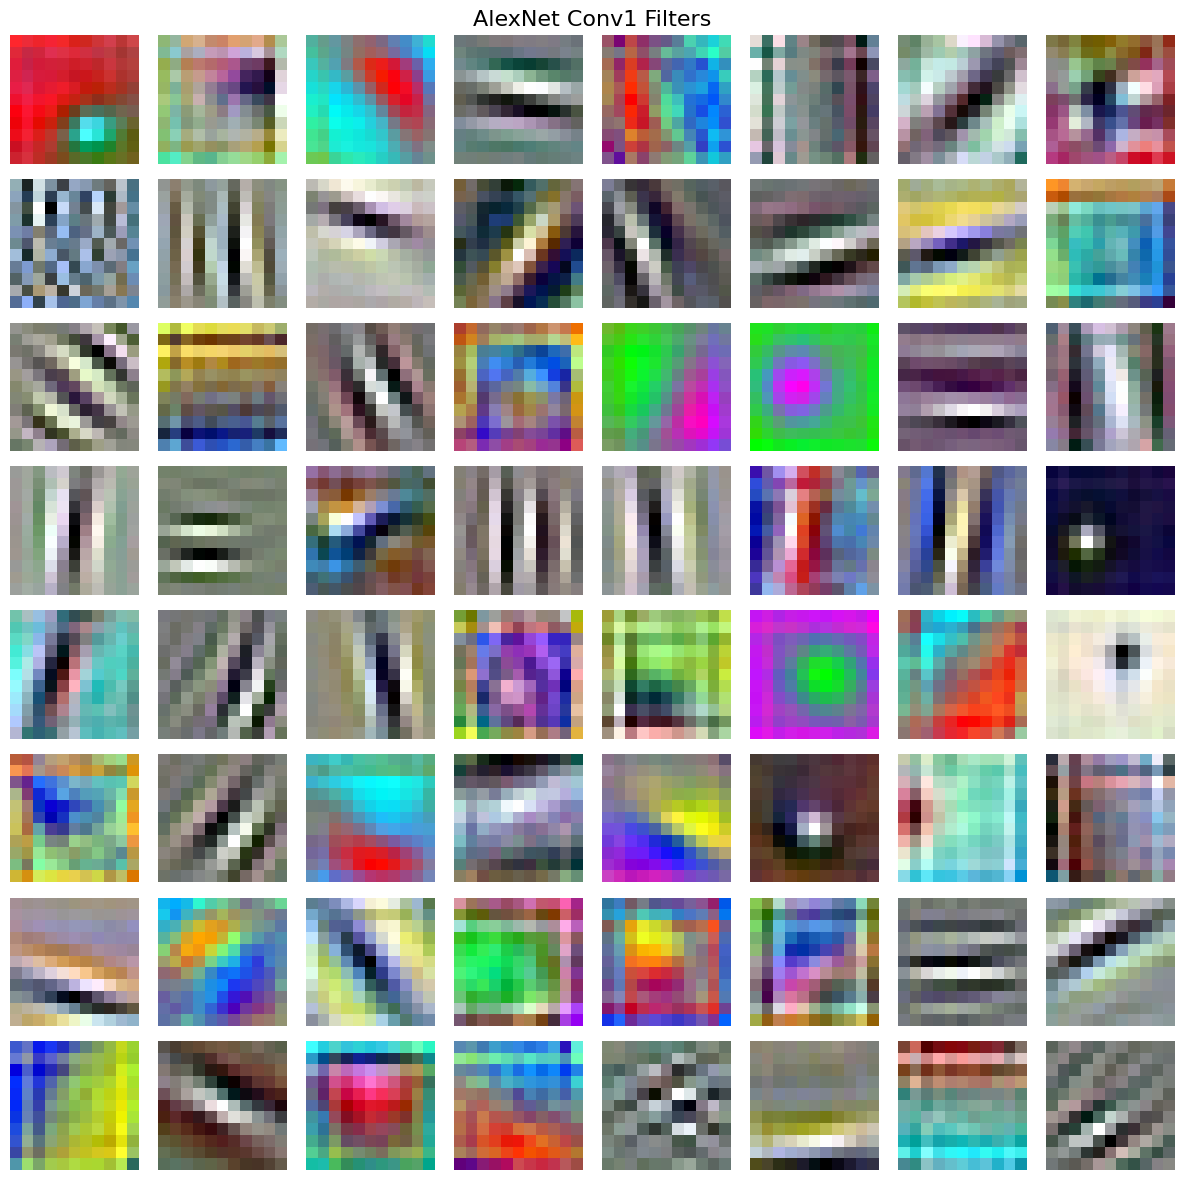

Feature maps shape: torch.Size([64, 55, 55])


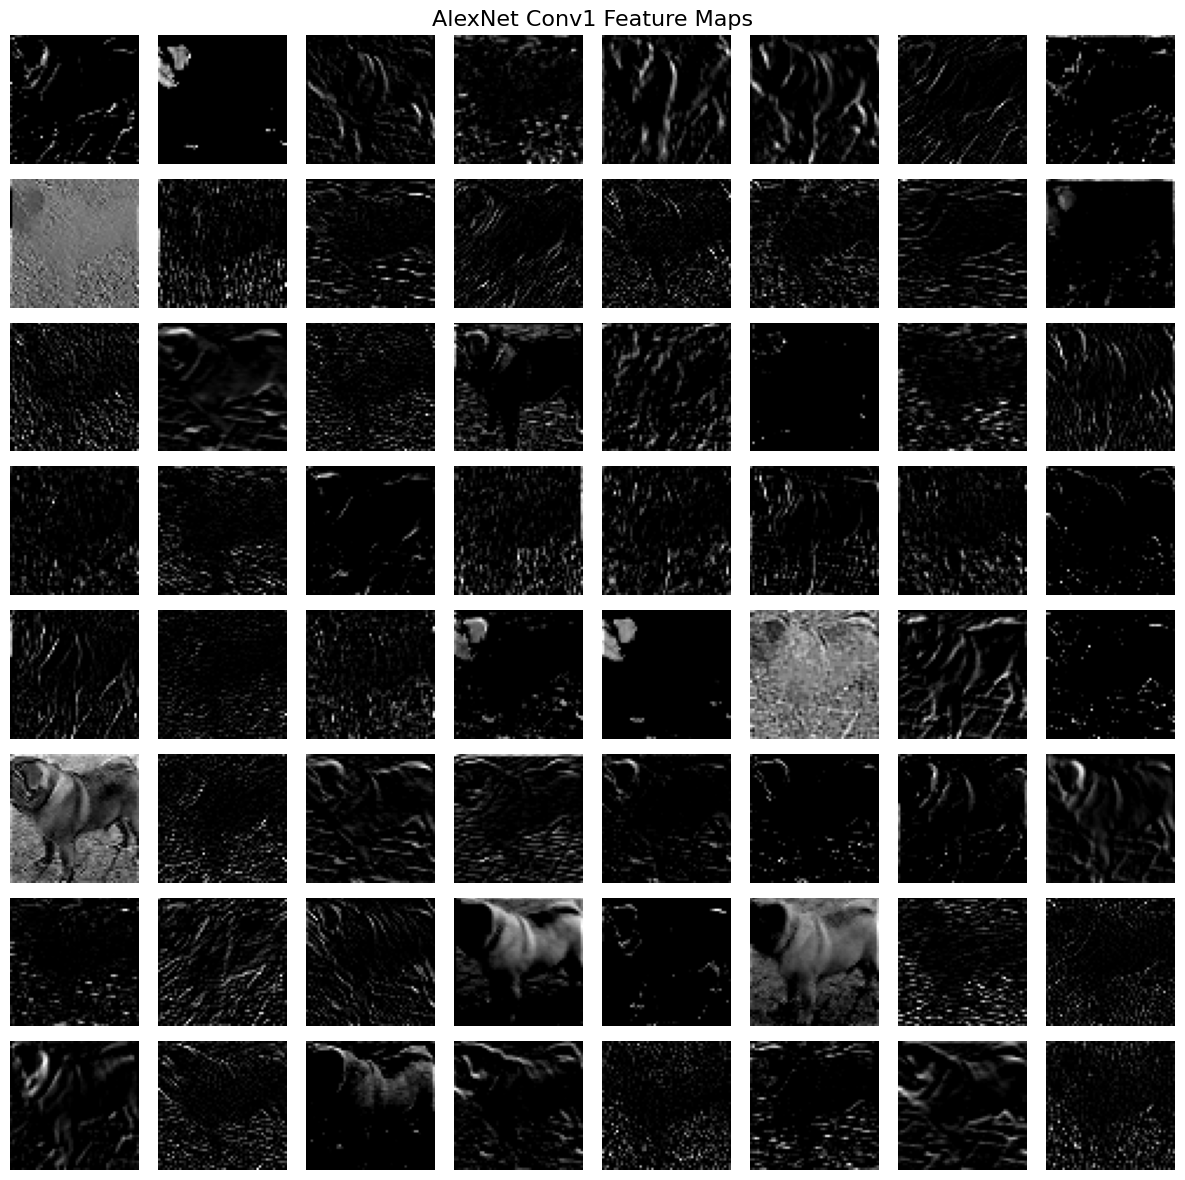

In [11]:
#8.)Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.
# Visualize filters & feature maps of first conv layer of AlexNet
# Requirements:
!pip install torch torchvision matplotlib pillow

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 1. Load pretrained AlexNet
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)
alexnet.eval()
alexnet.to(device)

# -------------------------------------------------------
# PART 1: Visualize filters of the first conv layer
# -------------------------------------------------------
# First conv layer is alexnet.features[0]
conv1 = alexnet.features[0]
print(conv1)

# conv1.weight shape: (out_channels, in_channels, kH, kW)
filters = conv1.weight.data.clone().cpu()  # shape: (64, 3, 11, 11)
num_filters = filters.shape[0]

# Normalize each filter to [0,1] for plotting
filters_min = filters.min(dim=2, keepdim=True)[0].min(dim=3, keepdim=True)[0]
filters_max = filters.max(dim=2, keepdim=True)[0].max(dim=3, keepdim=True)[0]
filters_norm = (filters - filters_min) / (filters_max - filters_min + 1e-5)

# Plot filters in a grid
grid_size = int(math.ceil(math.sqrt(num_filters)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle("AlexNet Conv1 Filters", fontsize=16)

for i in range(grid_size * grid_size):
    ax = axes[i // grid_size, i % grid_size]
    ax.axis("off")
    if i < num_filters:
        # Convert (C,H,W) -> (H,W,C)
        f = filters_norm[i].permute(1, 2, 0).numpy()
        ax.imshow(f)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# PART 2: Visualize feature maps for an example image
# -------------------------------------------------------
# Replace this with your image path
img_path = "example.jpg"  # e.g. "C:/Users/you/Desktop/dog.jpg"

# Preprocessing matching ImageNet-trained models
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load and preprocess image
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img).unsqueeze(0).to(device)  # shape: (1, 3, 224, 224)

# Pass through first conv + ReLU only
with torch.no_grad():
    # AlexNet features: [0]=Conv, [1]=ReLU, [2]=MaxPool, ...
    x = alexnet.features[0](input_tensor)  # conv1 output
    x = alexnet.features[1](x)            # ReLU
    feature_maps = x.squeeze(0).cpu()     # shape: (64, H, W)

print("Feature maps shape:", feature_maps.shape)

# Visualize some of the feature maps
num_feature_maps = feature_maps.shape[0]
grid_size = int(math.ceil(math.sqrt(num_feature_maps)))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
fig.suptitle("AlexNet Conv1 Feature Maps", fontsize=16)

for i in range(grid_size * grid_size):
    ax = axes[i // grid_size, i % grid_size]
    ax.axis("off")
    if i < num_feature_maps:
        fmap = feature_maps[i].numpy()
        # Normalize to [0,1] for display
        fmap_min, fmap_max = fmap.min(), fmap.max()
        fmap = (fmap - fmap_min) / (fmap_max - fmap_min + 1e-5)
        ax.imshow(fmap, cmap="gray")

plt.tight_layout()
plt.show()

Using device: cuda
Train size: 10000 Val size: 2000

Epoch 1/5
--------------------
train Loss: 1.8373  Acc: 0.3056
val Loss: 2.3289  Acc: 0.2605

Epoch 2/5
--------------------
train Loss: 1.5900  Acc: 0.4024
val Loss: 1.9905  Acc: 0.3625

Epoch 3/5
--------------------
train Loss: 1.4105  Acc: 0.4712
val Loss: 1.5074  Acc: 0.4675

Epoch 4/5
--------------------
train Loss: 1.2891  Acc: 0.5305
val Loss: 1.2828  Acc: 0.5335

Epoch 5/5
--------------------
train Loss: 1.1711  Acc: 0.5771
val Loss: 1.2734  Acc: 0.5445

Training complete in 1m 20s
Test Accuracy on CIFAR-10 (small training subset): 0.5504


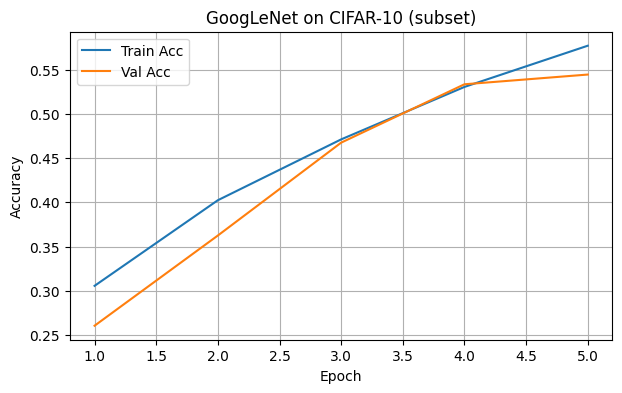

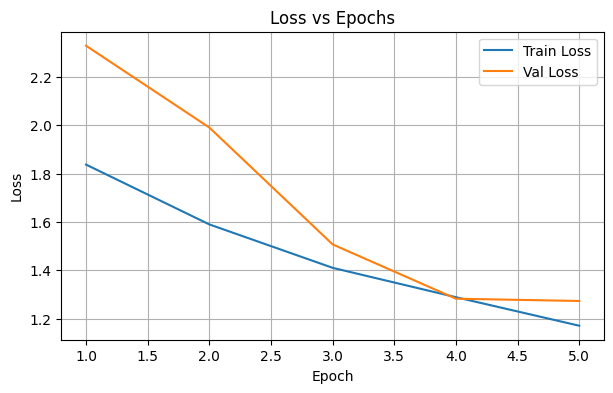

Train and val accuracies are close → model not severely over/underfitting.


In [13]:
#9.)Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.
# FAST DEMO: GoogLeNet on a small subset of CIFAR-10
# Still plots train/val accuracy so you can analyze over/underfitting

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------
# 1. Data (CIFAR-10, small subset)
# -----------------------
transform = transforms.Compose([
    transforms.Resize(128),       # smaller than 224 → faster
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])

full_train_dataset = datasets.CIFAR10(root="./data", train=True,
                                      download=True, transform=transform)

test_dataset = datasets.CIFAR10(root="./data", train=False,
                                download=True, transform=transform)

# Use only a subset for speed (e.g., 10k train, 2k val)
subset_size = 12000
train_val_subset, _ = random_split(full_train_dataset, [subset_size, len(full_train_dataset) - subset_size])

val_size = 2000
train_size = subset_size - val_size
train_dataset, val_dataset = random_split(train_val_subset, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

dataloaders = {"train": train_loader, "val": val_loader}
dataset_sizes = {"train": len(train_dataset), "val": len(val_dataset)}
print("Train size:", dataset_sizes["train"], "Val size:", dataset_sizes["val"])

# -----------------------
# 2. Model: GoogLeNet
# -----------------------
model = models.googlenet(weights=None, aux_logits=False, num_classes=10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -----------------------
# 3. Training loop (few epochs)
# -----------------------
num_epochs = 5   # fewer epochs → much faster

train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

since = time.time()

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 20)

    for phase in ["train", "val"]:
        if phase == "train":
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == "train"):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                if phase == "train":
                    loss.backward()
                    optimizer.step()

            running_loss   += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels).item()

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc  = running_corrects / dataset_sizes[phase]

        if phase == "train":
            train_loss_history.append(epoch_loss)
            train_acc_history.append(epoch_acc)
            scheduler.step()
        else:
            val_loss_history.append(epoch_loss)
            val_acc_history.append(epoch_acc)

        print(f"{phase} Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")

time_elapsed = time.time() - since
print(f"\nTraining complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")

# -----------------------
# 4. Test accuracy
# -----------------------
model.eval()
test_correct, test_total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_correct += torch.sum(preds == labels).item()
        test_total   += labels.size(0)

test_acc = test_correct / test_total
print(f"Test Accuracy on CIFAR-10 (small training subset): {test_acc:.4f}")

# -----------------------
# 5. Plot accuracy curves
# -----------------------
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(7,4))
plt.plot(epochs_range, train_acc_history, label="Train Acc")
plt.plot(epochs_range, val_acc_history, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("GoogLeNet on CIFAR-10 (subset)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(epochs_range, train_loss_history, label="Train Loss")
plt.plot(epochs_range, val_loss_history, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# 6. Quick overfitting / underfitting comment
# -----------------------
if train_acc_history[-1] > val_acc_history[-1] + 0.1:
    print("Likely overfitting: train acc >> val acc.")
elif val_acc_history[-1] > train_acc_history[-1] + 0.1:
    print("Possible underfitting: val acc > train acc (rare) or model not trained enough.")
else:
    print("Train and val accuracies are close → model not severely over/underfitting.")

In [16]:
#10.)You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use
import os
import io
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# ---------------------------
# CONFIG
# ---------------------------
num_classes = 3
class_names = ["normal", "pneumonia", "covid"]
checkpoint_path = "models/resnet50_xray.pt"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# STEP 1: Create dummy model (if not exists)
# ---------------------------
os.makedirs("models", exist_ok=True)

if not os.path.exists(checkpoint_path):
    print("Checkpoint not found. Creating dummy model...")

    model = models.resnet50(weights=None)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    torch.save(
        {
            "model_state_dict": model.state_dict(),
            "class_names": class_names,
        },
        checkpoint_path,
    )
    print(f"Dummy model saved to {checkpoint_path}")
else:
    print(f"Found existing checkpoint at {checkpoint_path}")

# ---------------------------
# STEP 2: Load model for inference
# ---------------------------
checkpoint = torch.load(checkpoint_path, map_location=device)
loaded_class_names = checkpoint["class_names"]

model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, len(loaded_class_names))
model.load_state_dict(checkpoint["model_state_dict"])
model = model.to(device)
model.eval()

# Same preprocessing you would use in training
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

def predict_pil_image(img: Image.Image):
    """Takes a PIL image and returns prediction + probabilities."""
    model.eval()
    input_tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = torch.softmax(outputs, dim=1)[0]
        confidence, pred_idx = torch.max(probs, dim=0)

    return {
        "prediction": loaded_class_names[pred_idx.item()],
        "confidence": float(confidence.item()),
        "class_probabilities": {
            loaded_class_names[i]: float(probs[i].item())
            for i in range(len(loaded_class_names))
        },
    }

print("Dummy model ready for prediction.")

Using device: cuda
Found existing checkpoint at models/resnet50_xray.pt
Dummy model ready for prediction.


In [17]:
from google.colab import files

# Upload an X-ray or any image
uploaded = files.upload()

for fname in uploaded.keys():
    print("Running prediction on:", fname)
    img = Image.open(fname).convert("RGB")
    result = predict_pil_image(img)
    print(result)

Saving Screenshot 2024-03-10 145353.png to Screenshot 2024-03-10 145353.png
Running prediction on: Screenshot 2024-03-10 145353.png
{'prediction': 'pneumonia', 'confidence': 1.0, 'class_probabilities': {'normal': 3.259122572513151e-14, 'pneumonia': 1.0, 'covid': 1.7972325017101554e-12}}
